## Exercise 1

In [424]:

import pandas as pd 
import numpy as np 

# libraries for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn functions

from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.pipeline import Pipeline # for creating the pipeline
# Preprocessing inside the pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
#Model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve # evaluating the model
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict #crossvalidation

In [362]:
df = pd.read_csv('train.csv') # loading the dataset

In [363]:
df.head() # printing first 5 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Q1:
Use the titanic data set, perform preprocessing by deal with missing values, drop 
irrelevant attributes.

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [365]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We observe that Cabin has far too many missing values and hence we will remove it. Name as an attributes is irrelevant to the survival chances and will also be removed from the dataset.

In [366]:
df.drop(['Name', 'Cabin'], axis = 1, inplace = True)

#### Exploring other variables

In [367]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [368]:
df.Ticket.unique().shape

(681,)

We find that Ticket has 681 unique values. This will mean that no true pattern can be assessed/discerned from any of these values as the total size of the dataset is 891. This will only work to reduce our accuracy if we keep this attrubute. Hence we will remov ethis attribute from the data we will be using

In [369]:
df.drop(['Ticket'], axis = 1, inplace = True) # dropping 'Ticket' column from the data

In [370]:
df_copy = df.copy() # creating a copy of the dataset to explose 'PassengerId'
df_copy.PassengerId = df_copy.PassengerId//100 # binning PassengerId into bins of 100
table = pd.crosstab(df_copy.PassengerId, df_copy.Survived) # tabulating PassengerId against Survived

In [371]:
percent_s = table[1]/(table[0] + table[1]) # finding percentage survivors in each bin
percent_s # displaying percent_s

PassengerId
0    0.414141
1    0.280000
2    0.380000
3    0.490000
4    0.370000
5    0.420000
6    0.360000
7    0.370000
8    0.369565
dtype: float64

In [372]:
percent_s.describe()

count    9.000000
mean     0.383745
std      0.056401
min      0.280000
25%      0.369565
50%      0.370000
75%      0.414141
max      0.490000
dtype: float64

From the above description we can see that the standard deviation of the percentage of survivors from each bin is very low < 1 which implies a lesser than 0.05 variance. Hence we can say that 'PassengerId' as an attributes does not differentiate/ separate between any of the survived classes and is hence an irrelavant attribute for us.

In [373]:
df.drop(['PassengerId'], axis = 1, inplace = True) # dropping 'PassengerId'

In [374]:
df.Age.describe() # distribution of Age before filling missing values

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

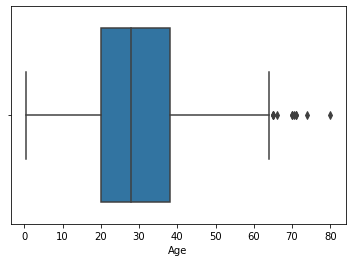

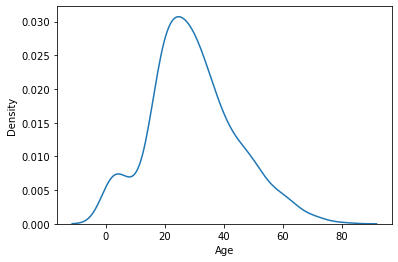

In [375]:
# visualising the distribution of Age before filling in missing values
sns.boxplot(x = df.Age) 
plt.show()
sns.kdeplot(x = df.Age)
plt.show()

In [376]:
df.Age.fillna(value = df.Age.mean(), inplace = True) # replacing all missing values of Age with mean of Age

In [377]:
df.Age.describe() # new distribution of Age

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

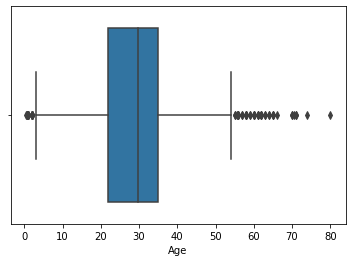

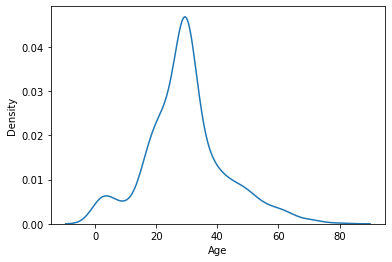

In [378]:
# visualising the new distribution of Age after filling in missing values
sns.boxplot(x = df.Age) 
plt.show()
sns.kdeplot(x = df.Age)
plt.show()

By filling in the missing values of Age with the mean, we se that the mean of the distribution remains the same, whil;e the standard deviation has decreased from 14.52 to 13.0. The Upper and lower bunds have also shifted as observed by comparing the two boxplots. Finally, on observing both kde plots, the distribution after filling in missing values, has become sharper which implies a higher kurtosis value, which is why the standard deviation of the data has reduced as well. 

In [379]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Dealing with the missing values from the Embarked Column

In [380]:
df.Embarked.fillna(value = df.Embarked.mode()[0], inplace = True) # replacing null values with the value with highest frequency

In [381]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We have now dealt with all missing values.

## Q2:
Use the scikit learn pipelines to perform the preprocessing - standardizing, 
encoding and model fitting in one step

In [382]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [383]:
Y = df.Survived # assigning target variable
df.drop('Survived', axis = 1, inplace = True) # dropping target variable from dataset
X = df # assigning the remaining data as independent attributes

In [384]:
# creating pipelines for categoric and numeric attrbutes

# categoric attributes pipeline
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown='ignore'))
])

#numeric attributes pipeline
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [385]:
# storing the names of all numeric attributes
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# storing the names of all categoric attributes
categorical_features = X.select_dtypes(include=['object']).columns

# declaring a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features ),
        ('categoric', OneHotEncoder(sparse = False, handle_unknown='ignore'), categorical_features)
    ])

In [386]:
# splitting the datset into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [444]:
# creating the pipeline for the model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])

#fitting the model to the dataset
model_pipeline.fit(X_train, Y_train)
pred_y = model_pipeline.predict(X_test)
accuracy_score(Y_test, pred_y)

0.776536312849162

Upon running the model simply using gaussian naive bayes, we are getting an accuracy of 77.65%

## Q3:
Perform Bayes classification using cross validation.

In [445]:
cv_score = cross_val_score(model_pipeline, X, Y, cv=5, scoring = 'accuracy') # performing cross validation on the Guassian model

In [446]:
cv_score.mean()

0.7890276818780995

Upon performing Cross validation, with number of folds = 5, we get a mean accuracy of 78.9%

## Q4:
Tabulate using relevant measures of accuracy , Sensitivity and specificity

In [447]:
test_pred = model_pipeline.predict(X_test) # predicting

In [448]:
model_acc = accuracy_score(Y_test, test_pred) # calculating model accuracy

In [449]:
model_acc

0.776536312849162

In [450]:
conf_mat = confusion_matrix(Y_test, test_pred) # making the confusion maatrix

In [451]:
((tn, fp),(fn, tp)) = conf_mat #unpacking the confusion matrix

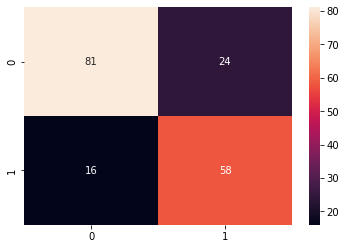

In [452]:
#visualising the confusion matrix
sns.heatmap( conf_mat, annot = True)
plt.show()

In [453]:
# calculating recall/sensitivity and specificity
recall = tp/(tp+fn)
specificity = tn/(tn+fp)

In [454]:
print(f"Model Accuracy: {model_acc:.6f}\nRecall: {recall:.6f}\nSpecificity: {specificity:.6f}")

Model Accuracy: 0.776536
Recall: 0.783784
Specificity: 0.771429


Based on all of the above metrics that we have just checked, accuracy of predicitions are 77.65%, Recall of the model is 78.38% which means that the model is able to predict positive cases correctly 78.38% of the time. Finally the specificity is 77.14% and implies that negative cases are predicted correctly 77.14% of the time.

## Q5:
Visualize the ROC curve and comment on performance

In [455]:
test_pred_proba = model_pipeline.predict_proba(X_test)

In [456]:
roc = roc_curve(Y_test, test_pred_proba[:,0])

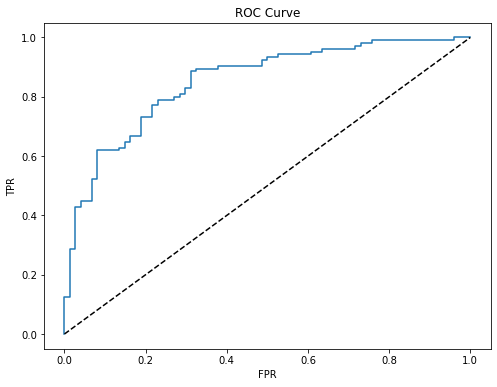

In [457]:
plt.figure(figsize = (8,6))
plt.plot(roc[1], roc[0])
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

We observe that the roc curve is above the TPR = FPR line. The curve is also close to the top left corner. This implies that there is a good accuracy. Based on all of the evaluation metrics, the model is giving a fair accuracy of predicting those who survived and those who did not